In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt


from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

import libpysal
import warnings 

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [26]:
df=pd.read_csv('/content/drive/MyDrive/master dissertation/pca_out.csv',encoding= 'unicode_escape')

In [20]:
df.head()

,Unnamed: 0,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment,New Code
0,0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,...,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,1,second,E09000001
1,1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,...,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,0,first,E05000026
2,2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,...,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,0,first,E05000027
3,3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,...,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,0,first,E05000028
4,4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,...,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first,E05000029


In [27]:
ward = gpd.read_file('/content/drive/MyDrive/master dissertation/ESRI/London_Ward_CityMerged.shp')

In [28]:
geo_components = [
                 # 'GSS_CODE',
                  #'geometry',
                  #'NAME',
         'Component 1',
'Component 2',
'Component 3'         
]

In [89]:
geo_components_df = df[geo_components]
geo_components_df

,Component 1,Component 2,Component 3
0,-0.844200,0.473115,0.069279
1,0.553066,0.055107,0.303061
2,0.748068,-0.334256,-0.204671
3,0.724636,-0.249746,-0.066011
4,0.536911,-0.534926,-0.113090
...,...,...,...
620,-0.322536,0.262477,0.017096
621,0.063130,0.195222,0.059452
622,-0.246736,0.431270,0.099974
623,1.129860,-0.120534,-0.176619


In [125]:
minPts = 4 # we set minPts as normed.shape[1] + 1 
epsilon = 0.15
dbsc = DBSCAN(eps=epsilon, min_samples=minPts)
dbsc.fit(geo_components_df)

# We now have our DBSCAN object created, and we can extract the groups it has identified. We do this using the `.labels_` method.
cluster_nm = dbsc.labels_

In [126]:
usable = df[[
'Children_Poverty_Rate', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'HD1', 'HD2', 'L1', 'L2', 'O', 'P1', 'P2', 'P3', 'Q',
       'Component 1', 'Component 2', 'Component 3',
        'New Code'
]]

In [127]:
usable_df = pd.DataFrame(usable)

In [128]:
cluster_df = pd.DataFrame(cluster_nm)

In [129]:
df_segm_dbscan = pd.concat([usable_df, cluster_df], axis=1,ignore_index=True).rename(
    columns={0:"Children_Poverty_Rate",
             1: 'E1',
             2:"E2",
             3: "E3",
             4: "E4",
             5:"E5",
             6:"E6",
             7:'HD1',
             8:"HD2",
             9:'L1',
             10:'L2',
             11:'O',
             12:'P1',
             13:'P2',
             14:'P3',
             15:'Q',
             16:'Component 1',
             17:'Component 2',
             18:'Component 3',
             19:'New Code',
             20:'clusters'
            })

In [130]:
df_segm_dbscan

,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,...,O,P1,P2,P3,Q,Component 1,Component 2,Component 3,New Code,clusters
0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,...,12.000000,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,E09000001,-1
1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,...,28.472222,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,E05000026,0
2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,...,33.538462,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,E05000027,0
3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,...,32.571429,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,E05000028,0
4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,...,30.172414,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,E05000029,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,...,24.000000,10.843373,74.096386,15.060241,6.4,-0.322536,0.262477,0.017096,E05000645,0
621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,...,28.787879,14.077670,72.815534,12.621359,7.7,0.063130,0.195222,0.059452,E05000646,0
622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,...,24.347826,10.994764,76.963351,12.041885,7.7,-0.246736,0.431270,0.099974,E05000647,0
623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,...,47.692308,21.235521,69.884170,9.266409,7.4,1.129860,-0.120534,-0.176619,E05000648,-1


In [131]:
df_segm_dbscan['clusters'].values

array([-1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0

In [132]:
df_segm_dbscan['Segment'] = df_segm_dbscan['clusters'].map({
    -1:'noise',
    0:'first',
    1:'second',
    2:'third',
    3:'fouth',
    })

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


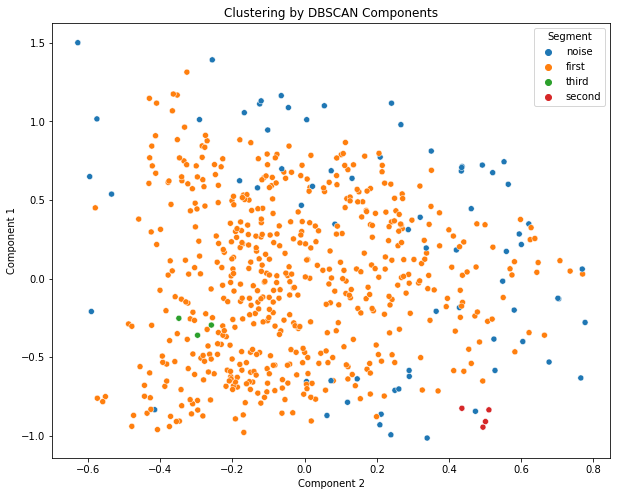

In [133]:
x_axis = df_segm_dbscan['Component 2']
y_axis = df_segm_dbscan['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_dbscan['Segment'])
plt.title('Clustering by DBSCAN Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


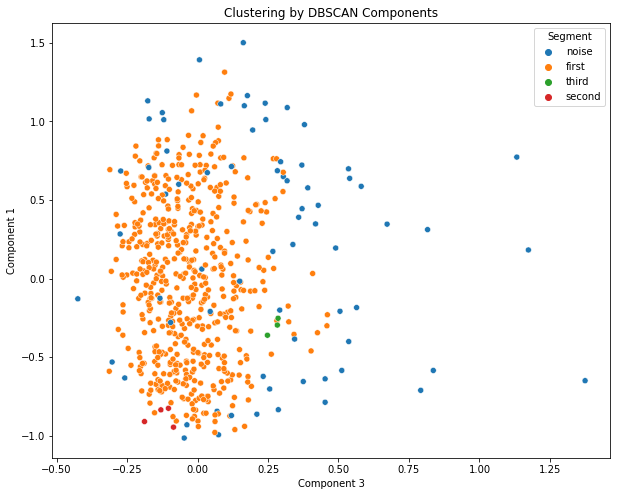

In [134]:
x_axis = df_segm_dbscan['Component 3']
y_axis = df_segm_dbscan['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_dbscan['Segment'])
plt.title('Clustering by DBSCAN Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


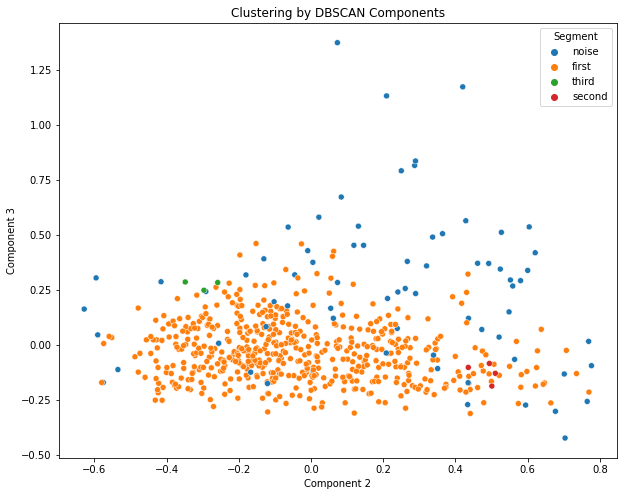

In [135]:
x_axis = df_segm_dbscan['Component 2']
y_axis = df_segm_dbscan['Component 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_dbscan['Segment'])
plt.title('Clustering by DBSCAN Components')
plt.show()

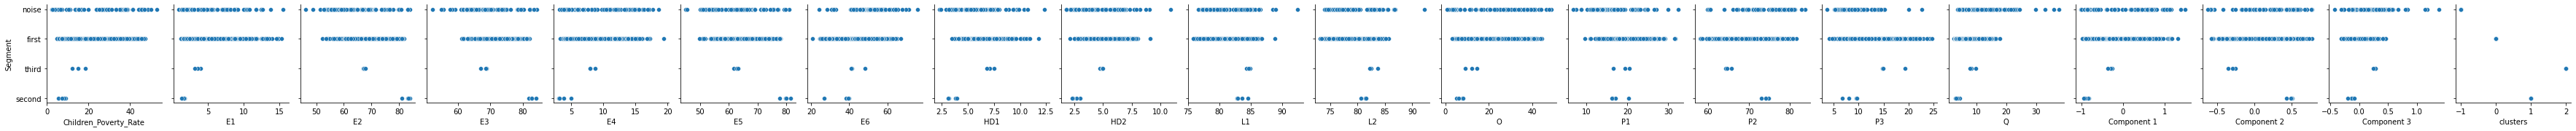

In [136]:
sns.pairplot(df_segm_dbscan, y_vars='Segment')

In [137]:
joined = ward.merge(df_segm_dbscan,left_on = 'GSS_CODE', right_on ='New Code')

Text(0.5, 1.0, 'DBSCAN Clustering of Child Poverty in London')

<Figure size 1440x1152 with 0 Axes>

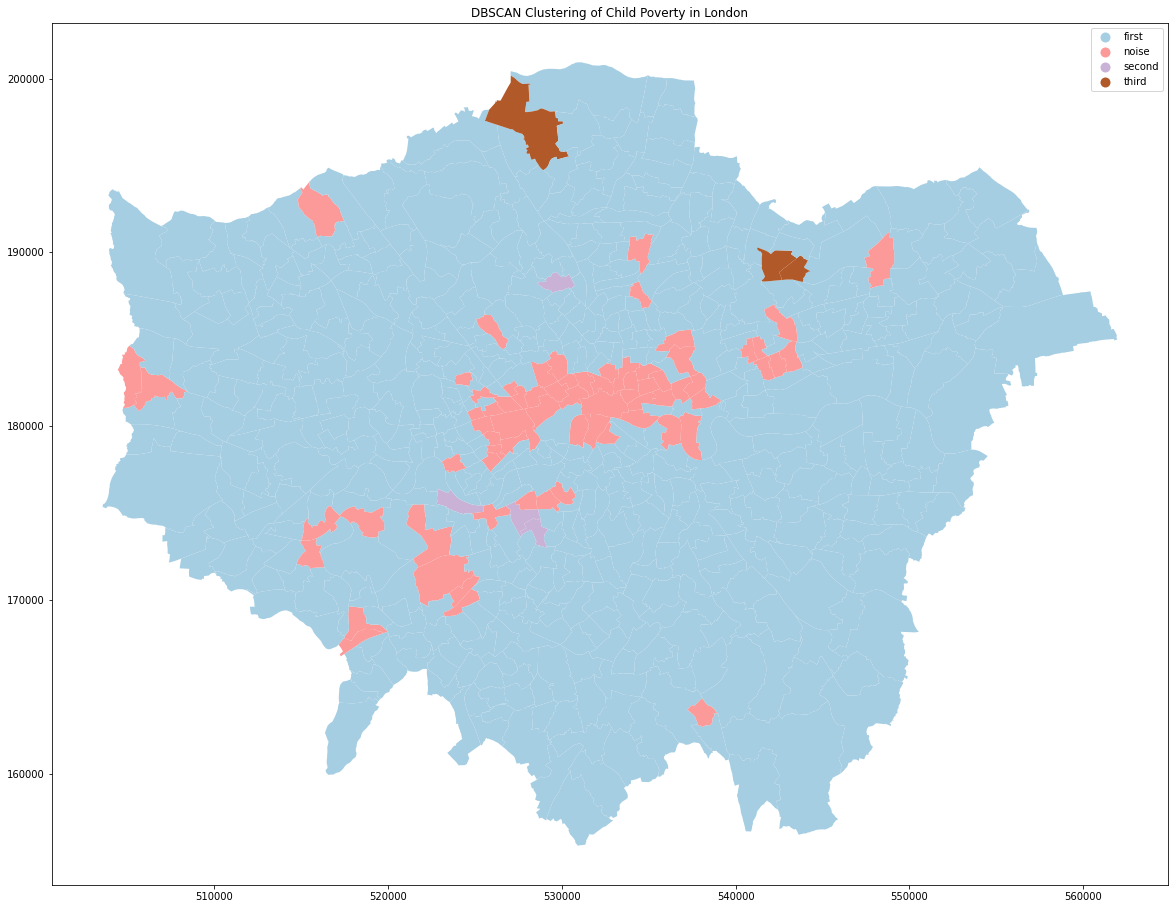

In [138]:
plt.figure(figsize = (20,16))
joined.plot(column='Segment', categorical=True, legend=True, figsize=(20,16), cmap='Paired');
plt.title('DBSCAN Clustering of Child Poverty in London')